In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [67]:
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# /split the dataset

data  =  np.array(data)
m, n =  data.shape
np.random.shuffle(data)

data_dev =  data[0:1000].T
X_dev = data_dev[0]
Y_dev = data_dev[1:n]
X_dev = X_dev/ 255.

data_train =  data[1000:m].T
y_train =  data_train[0]
x_train =  data_train[1:n]
x_train= x_train/255.

s, m =  x_train.shape

In [70]:
y_train

array([2, 7, 4, ..., 7, 6, 5])

In [71]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5 
    b1= np.random.rand(10, 1) - 0.5 
    w2 = np.random.rand(10, 10) - 0.5 
    b2 = np.random.rand(10, 1) - 0.5
    
    return w1, b1, w2, b2


In [72]:
def reLU(z):
    return np.maximum(z, 0)

In [73]:
def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a

In [74]:
def forword_prop(w1, b1, w2, b2, x):
    z1 =  w1.dot(x) + b1
    print("z1", z1.shape)
    a1 = reLU(z1)
    print("A1", a1.shape)
    z2 =  w2.dot(a1) + b2
    a2 =  softmax(z2)
    
    return z1, a1, z2, a2

In [75]:
def one_hot(Y):
    one_hot_Y =  np.zeros((Y.size, Y.max() +  1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y =  one_hot_Y.T
    return one_hot_Y

In [76]:
def deriv_reLU(z):
    return z >  0

In [77]:
def backword_prop(z1, a1, z2, a2,  w2, X,  Y):
    m =  Y.size
    one_hot_Y =  one_hot(Y)
    dz2 = a2 -  one_hot_Y
    dw2 =  1/m * dz2.dot(a1.T)
    db2 = 1/m  * np.sum(dz2)
    dz1 = w2.T.dot(dz2 ) * deriv_reLU(z1)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw1, db1, dw2, db2

In [78]:
def update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 -  alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 -  alpha * dw2
    b2 = b2 - alpha * db2
    
    return w1, b1, w2, b2

In [79]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predications, Y):
    return np.sum(predications == Y) / Y.size

In [80]:
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 =  init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forword_prop( w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backword_prop( z1, a1, z2, a2,w2,  X, Y)
        w1, b1, w2, b2 = update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 2 == 0:
            print("Iterastion ", i)
            print("AccuraCY :: ", get_accuracy(get_predictionas(a2), Y) )
    return w1, w2, b1, b2

In [81]:
w1, w2, b1, b2 = gradient_descent(x_train, y_train, 600, 0.1)

z1 (10, 41000)
A1 (10, 41000)
Iterastion  0
AccuraCY ::  0.1124390243902439
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  2
AccuraCY ::  0.08226829268292683
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  4
AccuraCY ::  0.08290243902439025
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  6
AccuraCY ::  0.0905609756097561
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  8
AccuraCY ::  0.1001219512195122
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  10
AccuraCY ::  0.11170731707317073
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  12
AccuraCY ::  0.12370731707317073
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  14
AccuraCY ::  0.13821951219512196
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterastion  16
AccuraCY ::  0.1541219512195122
z1 (10, 41000)
A1 (10, 41000)
z1 (10, 41000)
A1 (10, 41000)
Iterast

In [82]:
def make_predictions(X, W1, b1, W2, b2):
    print(W1.shape)
    _, _, _, A2 = forword_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

(10, 784)
z1 (10, 1)
A1 (10, 1)
Prediction:  [3]
Label:  2


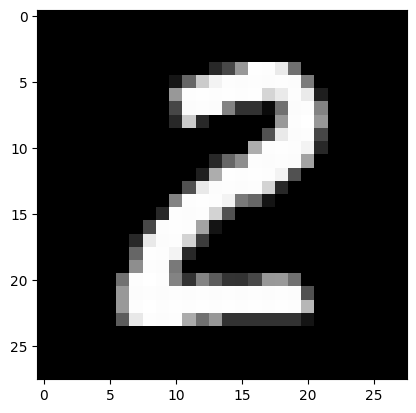

(10, 784)
z1 (10, 1)
A1 (10, 1)
Prediction:  [7]
Label:  7


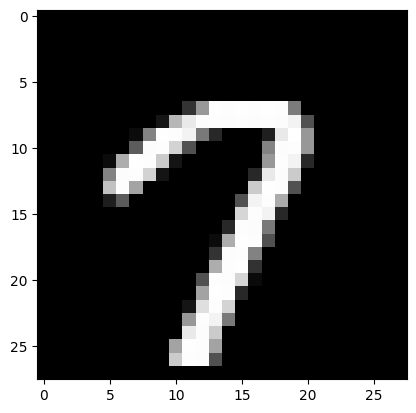

(10, 784)
z1 (10, 1)
A1 (10, 1)
Prediction:  [4]
Label:  4


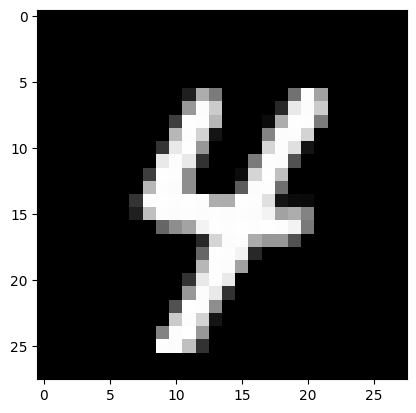

(10, 784)
z1 (10, 1)
A1 (10, 1)
Prediction:  [9]
Label:  9


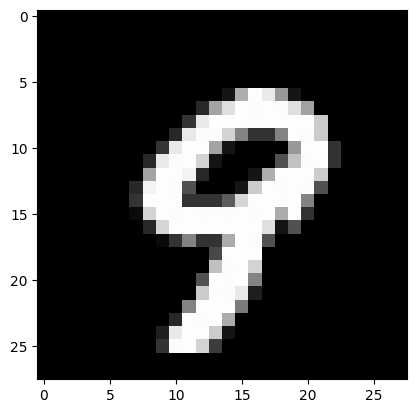

In [83]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1,w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)